# **3.1 Regression - 15 points**
In this part, we will use linear regressors with the help of different basis functions. In this homework, you are meant to use the closed form of the optimal parameters with the Least Square Error loss function described in the class. You are not going to find the parameters iteratively.

---

**Dataset:** You are asked to work on the Boston House Prices dataset. This dataset consists of 506 data samples and 13 real attributes (features). The target value is the Median value (’MEDV’) of owner-occupied homes in $1000’s (last column). The dataset is a csv file in the assignment1 folder.

**Allowed packages:** Pandas, Matplotlib, NumPy.

**Deliverables:** Please have the code, figures, and discussions in a Jupyter Notebook file (.ipynb). Your file should have five main sections, one for each task as follows:

---

1. First of all, we recommend checking whether the dataset includes missing parts. You can use Data
Cleaning and Exploratory Data Analysis techniques to achieve a clean dataset. Then split the dataset
into a train set (first 80% of the data) and a test set (last 20% of the data). Do NOT use the test set unless for final loss computation.

2. Plot the target values (’MEDV’) with respect to the ’LSTAT’ feature (first plot) and with respect to the ’DIS’ feature (second plot). Can you see any dependencies between the target values and ’LSTAT’ or ’DIS?

3. Using the closed form of the linear regression for the Least Square Error, find the optimal regression parameters (weights). Plot the predicted values with respect to ’LSTAT’ and ’DIS’ in two separate plots. Can you see any dependencies between the predicted value and ’LSTAT’ or ’DIS?

4. Add the 2nd order of each feature to the original feature vectors to double the number of features. Find the optimal parameters based on the new set of features and plot the predicted values with respect to ’LSTAT’ and ’DIS’ in two separate plots.

5. Report the MSE loss on training and testing sets for each section. Is adding the 2nd order of features helpful?

# **My Answer:**

# **Section 1: Data cleaning, standardization, and splitting**

---

1. Load the csv dataset
2. Check if there is any missing missing parts
3. Data standardization
4. Split the standardized dataset into a train set (first 80% of the data) and a test set (last 20% of the data)
5. Show the first 5 rows of the training and testing sets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def check_missingValues(data):
  missingValues = data.isnull().sum()
  # Check if there are any missing values in the dataset
  if missingValues.sum() == 0:
    return 'There are no missing values in the dataset.'
  else:
    # Provide details on the columns with missing values
    columns_with_missing = missingValues[missingValues > 0]
    return f'Columns with missing values:\n{columns_with_missing}'


# Load the CSV dataset
data = pd.read_csv(r'Boston_house_prices_dataset.csv')

# Check for missing values
result = check_missingValues(data)
print(result)

# Data standardization
for column in data.columns:
  # Calculate the mean and standard deviation of each feature
  mean, std = data[column].mean(), data[column].std()
  # Standardize each feature
  data[column] = (data[column] - mean) / std

# Split the standardized dataset into training and testing sets
trainSize = int(round(0.8 * len(data)))
trainData = data.iloc[:trainSize]
testData = data.iloc[trainSize:]

There are no missing values in the dataset.


In [2]:
# Show the first 5 rows of the training sets
print('Standardized Training sets: First 5 rows')
df_train = pd.DataFrame(trainData)
df_train.head()

Standardized Training sets: First 5 rows


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419367,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499,0.159528
1,-0.416927,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953,-0.101424
2,-0.416929,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532,1.322937
3,-0.416338,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171,1.181589
4,-0.412074,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487,1.486032


In [3]:
# Show the first 5 rows of the testing sets
print('Standardized Testing sets: First 5 rows')
df_test = pd.DataFrame(testData)
df_test.head()

Standardized Testing sets: First 5 rows


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
405,7.476247,-0.48724,1.014995,-0.272329,1.193543,-0.856276,1.116390,-1.125341,1.659603,1.529413,0.805778,0.309940,1.446135,-1.906340
406,1.988326,-0.48724,1.014995,-0.272329,0.900130,-3.055198,1.116390,-1.242784,1.659603,1.529413,0.805778,0.148376,1.496547,-1.156104
407,0.969311,-0.48724,1.014995,-0.272329,0.900130,-0.963020,1.116390,-1.191922,1.659603,1.529413,0.805778,-0.269282,-0.073247,0.583574
408,0.440661,-0.48724,1.014995,-0.272329,0.365083,-0.950211,1.041786,-1.111427,1.659603,1.529413,0.805778,-0.460421,1.925055,-0.579835
409,1.258469,-0.48724,1.014995,-0.272329,0.365083,0.807503,1.116390,-1.106298,1.659603,1.529413,0.805778,-1.942213,0.998022,0.540082


# **Section 2: Plotting the target values**

---

1. Plot the target values of "MEDV" with respect to "LSTAT" feature
2. Plot the target values of "MEDV" with respect to "DIS" feature

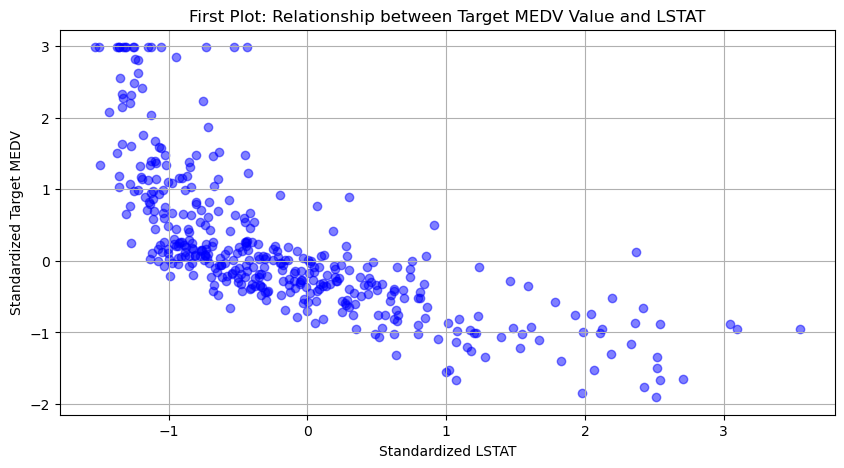

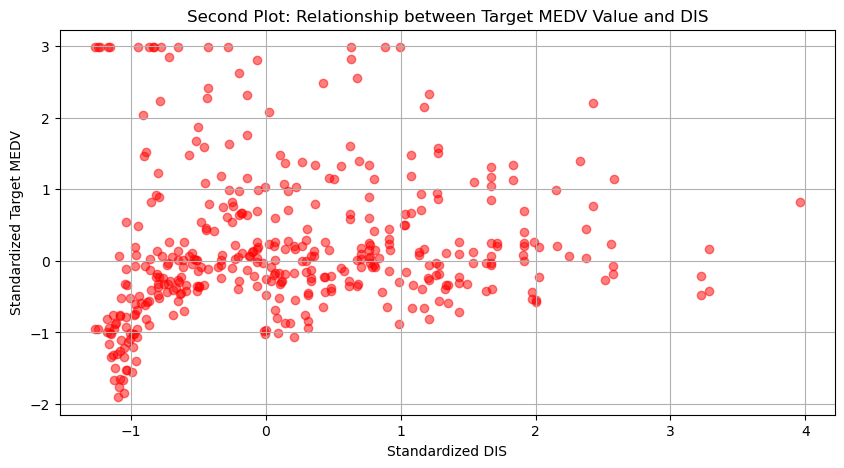

In [4]:
# Plot Target MEDV Value vs LSTAT
plt.figure(figsize=(10, 5))
plt.scatter(trainData['LSTAT'], trainData['MEDV'], color='blue', alpha=0.5)
plt.title('First Plot: Relationship between Target MEDV Value and LSTAT')
plt.xlabel('Standardized LSTAT')
plt.ylabel('Standardized Target MEDV')
plt.grid(True)
plt.show()

# Separate the two plots
print('\n')

# Plot Target MEDV Value vs DIS
plt.figure(figsize=(10, 5))
plt.scatter(trainData['DIS'], trainData['MEDV'], color='red', alpha=0.5)
plt.title('Second Plot: Relationship between Target MEDV Value and DIS')
plt.xlabel('Standardized DIS')
plt.ylabel('Standardized Target MEDV')
plt.grid(True)
plt.show()

**Results for Section 2**

---

1. Target MEDV vs LSTAT Plot:
> Overall, the distribution of the data is relatively dense. It can be observed that the LSTAT feature shows a negative correlation trend with the target MEDV value.

2. Target MEDV vs DIS Plot:
> The distribution of the data is relatively scattered and uneven. Generally, the DIS feature and the target MEDV value do not have any apparent dependencies.

# **Section 3: Compute the optimal regression parameters (weights)**

---

1. Split the training dataset into feature vectors (X) and target values (y)
2. Calculate the optimal regression parameters (weights)
3. Get the predicted values
4. Plot the predicted values of "MEDV" with respect to "LSTAT" and "DIS" feature in two separate plots



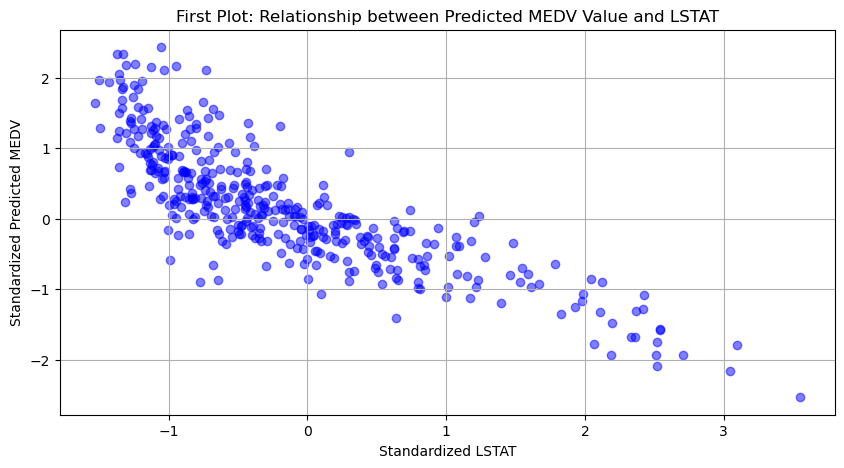

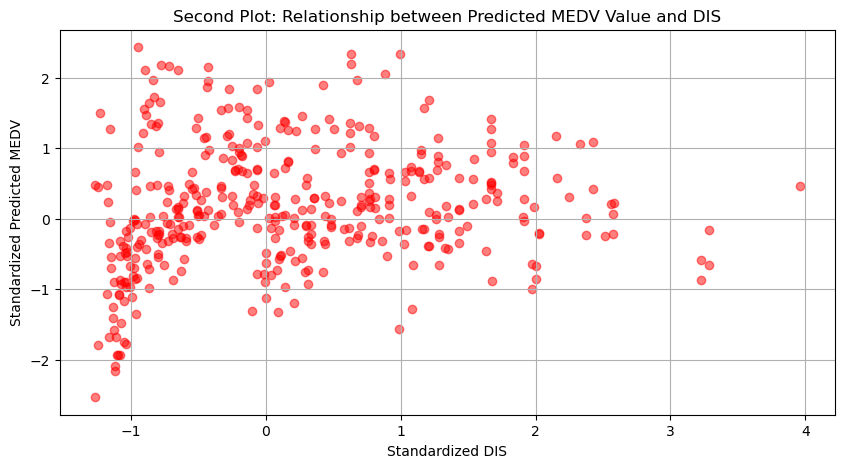

In [5]:
def computeWeights(X, y):
  return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

# Split the training dataset into feature vectors (X) and target values (y)
y_train = trainData['MEDV'].values
X_train = np.column_stack((np.ones(trainData.shape[0]), trainData.drop(columns=['MEDV'])))

# Calculate the optimal regression parameters (weights)
weights = computeWeights(X_train, y_train)

# Get the predicted values
predict_value_train = X_train.dot(weights)

# Plot Predicted MEDV Value vs LSTAT
plt.figure(figsize=(10, 5))
plt.scatter(trainData['LSTAT'], predict_value_train, color='blue', alpha=0.5)
plt.title('First Plot: Relationship between Predicted MEDV Value and LSTAT')
plt.xlabel('Standardized LSTAT')
plt.ylabel('Standardized Predicted MEDV')
plt.grid(True)
plt.show()

# Separate the two plots
print('\n')

# Plot Predicted MEDV Value vs DIS
plt.figure(figsize=(10, 5))
plt.scatter(trainData['DIS'], predict_value_train, color='red', alpha=0.5)
plt.title('Second Plot: Relationship between Predicted MEDV Value and DIS')
plt.xlabel('Standardized DIS')
plt.ylabel('Standardized Predicted MEDV')
plt.grid(True)
plt.show()


**Results for Section 3**

---

1. Predicted MEDV vs LSTAT Plot:
> The overall data distribution is denser, and there is a strong inverse relationship between the LSTAT feature and the predicted "MEDV" value.

2. Predicted MEDV vs DIS Plot:
> The data distribution is extremely scattered and uneven, and there is no evident trend or characteristic of the relationship between the DIS feature and the predicted "MEDV" value.


# **Section 4: Compute the new optimal regression parameters (weights) with extended set of features**

---

1. Add the 2nd order of each feature (except for the target column "MEDV") to the original feature vectors
2. Split the new dataset into a train set (first 80% of the data) and a test set (last 20% of the data)
3. Split the new training dataset into feature vectors (X) and target values (y)
3. Calculate the new optimal regression parameters (weights)
4. Get the new predicted values
5. Plot the new predicted values of "MEDV" with respect to "LSTAT" and "DIS" feature in two separate plots


In [6]:
# Add the 2nd order of each feature (except for the target column "MEDV") to the original feature vectors
for column in data.columns:
  if column != 'MEDV':
    data[f'{column}_add2nd'] = data[column] ** 2

# Split the new dataset into training and testing sets (after adding 2nd order)
trainData_add2nd = data.iloc[:trainSize]
testData_add2nd = data.iloc[trainSize:]

# Show the first 5 rows of the new training sets (after adding 2nd order)
print('Training sets (after adding 2nd order): First 5 rows')
df_train_add2nd = pd.DataFrame(trainData_add2nd)
df_train_add2nd.head()

Training sets (after adding 2nd order): First 5 rows


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,CHAS_add2nd,NOX_add2nd,RM_add2nd,AGE_add2nd,DIS_add2nd,RAD_add2nd,TAX_add2nd,PTRATIO_add2nd,B_add2nd,LSTAT_add2nd
0,-0.419367,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,...,0.074163,0.020758,0.170786,0.014375,0.019621,0.964071,0.443488,2.124475,0.194142,1.154548
1,-0.416927,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,...,0.074163,0.546905,0.037668,0.134545,0.309814,0.751731,0.972893,0.091685,0.194142,0.242017
2,-0.416929,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,...,0.074163,0.546905,1.642103,0.070516,0.309814,0.751731,0.972893,0.091685,0.156844,1.458135
3,-0.416338,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,...,0.074163,0.696320,1.030830,0.654623,1.159221,0.565771,1.221073,0.012751,0.172849,1.850065
4,-0.412074,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,...,0.074163,0.696320,1.506418,0.260788,1.159221,0.565771,1.221073,0.012751,0.194142,1.051623


In [7]:
# Show the first 5 rows of the new testing sets (after adding 2nd order)
print('Testing sets (after adding 2nd order): First 5 rows')
df_test_add2nd = pd.DataFrame(testData_add2nd)
df_test_add2nd.head()

Testing sets (after adding 2nd order): First 5 rows


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,CHAS_add2nd,NOX_add2nd,RM_add2nd,AGE_add2nd,DIS_add2nd,RAD_add2nd,TAX_add2nd,PTRATIO_add2nd,B_add2nd,LSTAT_add2nd
405,7.476247,-0.48724,1.014995,-0.272329,1.193543,-0.856276,1.116390,-1.125341,1.659603,1.529413,...,0.074163,1.424544,0.733209,1.246326,1.266393,2.754282,2.339104,0.649279,0.096063,2.091306
406,1.988326,-0.48724,1.014995,-0.272329,0.900130,-3.055198,1.116390,-1.242784,1.659603,1.529413,...,0.074163,0.810234,9.334234,1.246326,1.544512,2.754282,2.339104,0.649279,0.022015,2.239654
407,0.969311,-0.48724,1.014995,-0.272329,0.900130,-0.963020,1.116390,-1.191922,1.659603,1.529413,...,0.074163,0.810234,0.927408,1.246326,1.420679,2.754282,2.339104,0.649279,0.072513,0.005365
408,0.440661,-0.48724,1.014995,-0.272329,0.365083,-0.950211,1.041786,-1.111427,1.659603,1.529413,...,0.074163,0.133285,0.902901,1.085319,1.235270,2.754282,2.339104,0.649279,0.211987,3.705837
409,1.258469,-0.48724,1.014995,-0.272329,0.365083,0.807503,1.116390,-1.106298,1.659603,1.529413,...,0.074163,0.133285,0.652061,1.246326,1.223895,2.754282,2.339104,0.649279,3.772190,0.996048


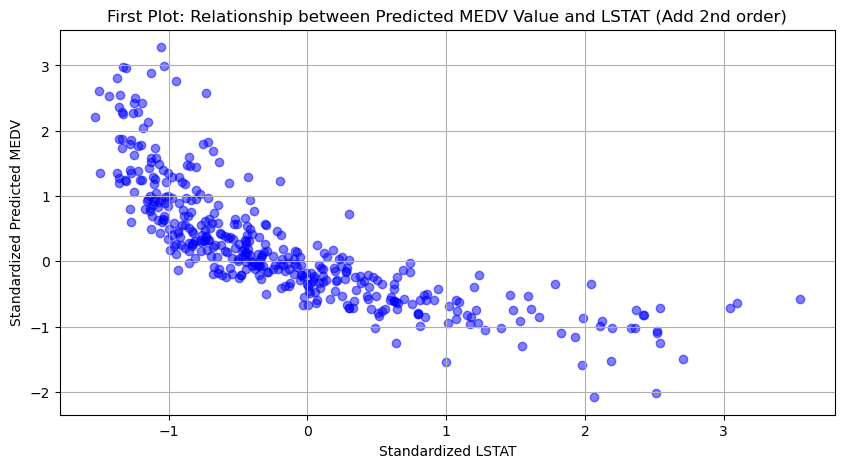

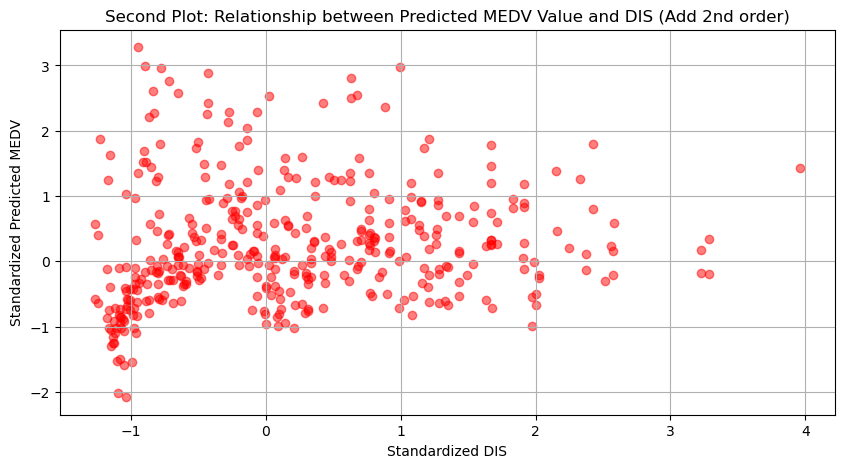

In [8]:
# Split the new training dataset into feature vectors (X) and target values (y)
y_train_add2nd = trainData_add2nd['MEDV'].values
X_train_add2nd = np.column_stack((np.ones(trainData_add2nd.shape[0]), trainData_add2nd.drop(columns=['MEDV'])))

# Calculate the new optimal regression parameters (weights)
weights_add2nd = computeWeights(X_train_add2nd, y_train_add2nd)

# Get the new predicted values
predict_value_train_add2nd = X_train_add2nd.dot(weights_add2nd)

# Plot Predicted MEDV Value vs LSTAT (Add 2nd order)
plt.figure(figsize=(10, 5))
plt.scatter(trainData_add2nd['LSTAT'], predict_value_train_add2nd, color='blue', alpha=0.5)
plt.title('First Plot: Relationship between Predicted MEDV Value and LSTAT (Add 2nd order)')
plt.xlabel('Standardized LSTAT')
plt.ylabel('Standardized Predicted MEDV')
plt.grid(True)
plt.show()

# Separate the two plots
print('\n')

# Plot Predicted MEDV Value vs DIS (Add 2nd order)
plt.figure(figsize=(10, 5))
plt.scatter(trainData_add2nd['DIS'], predict_value_train_add2nd, color='red', alpha=0.5)
plt.title('Second Plot: Relationship between Predicted MEDV Value and DIS (Add 2nd order)')
plt.xlabel('Standardized DIS')
plt.ylabel('Standardized Predicted MEDV')
plt.grid(True)
plt.show()

# **Section 5: Report the MSE loss on training and testing sets for each section**

---

1. Compute training and testing loss for the original features
2. Compute training and testing loss for the new features (after adding the 2nd order of each feature)

In [9]:
def mse_loss(y_true, y_pred):
  return np.mean((y_true - y_pred) ** 2)


# FOR ORIGINAL FEATURES


# Compute training loss:
# Use the predicted values (in previous sections) to compute the training loss.
mse_train = mse_loss(y_train, predict_value_train)

# Compute testing loss:
# Compute the predicted values for the testing set, then calculate the testing MSE.
y_test = testData['MEDV'].values
X_test = np.column_stack((np.ones(testData.shape[0]), testData.drop(columns=['MEDV'])))
predict_value_test = X_test.dot(weights)
mse_test = mse_loss(y_test, predict_value_test)


# FOR NEW FEATURES (AFTER ADDING 2ND ORDER FEATURE)


# Compute training loss:
# Use the predicted values (in previous sections) to compute the training loss.
mse_train_add2nd = mse_loss(y_train_add2nd, predict_value_train_add2nd)

# Compute testing loss:
# Compute the predicted values for the testing set, then calculate the testing MSE.
y_test_add2nd = testData_add2nd['MEDV'].values
X_test_add2nd = np.column_stack((np.ones(testData_add2nd.shape[0]), testData_add2nd.drop(columns=['MEDV'])))
predict_value_test_add2nd = X_test_add2nd.dot(weights_add2nd)
mse_test_add2nd = mse_loss(y_test_add2nd, predict_value_test_add2nd)


# Compare the training and testing losses for the original feature vectors and the new features (adding 2nd order of each feature)


# For original features
print('For original features')
print(f'Training loss: {mse_train}')
print(f'Testing loss: {mse_test}')
# For new features (adding 2nd order of each feature)
print('\nFor new features (add 2nd order)')
print(f'Training loss: {mse_train_add2nd}')
print(f'Testing loss: {mse_test_add2nd}')


For original features
Training loss: 0.2688032870571544
Testing loss: 0.3938396612210438

For new features (add 2nd order)
Training loss: 0.17704568432233528
Testing loss: 0.4156767850509633


**Results for Section 5**

---

Is adding the 2nd order of features helpful?  

**1. Reduced Training Loss with New Features:**  
The training loss has decreased when adding the 2nd order features (from 0.2688 to 0.1770). This suggests that the model with the 2nd order polynomial features might be capturing more complex patterns within the training data, therefore fitting the training data better.

**2. Increased Testing Loss with New Features:**  
The testing loss has increased when adding the 2nd order features (from 0.3938 to 0.4157). This suggests that the new model might be overfitting to the training data, capturing noise as patterns, which does not generalize well to the unseen testing data.

**3. Discrepancy Between Training and Testing Loss:**  
For the model with the 2nd order features, the discrepancy between training and testing loss has widened compared to the original features. This is typically a sign of overfitting, where the model performs significantly better on training data than it does on testing data.

**Conclusions:**  

The addition of 2nd order features seems to have caused the model to overfit, as evidenced by the decrease in training loss but increase in testing loss. While the model is learning the training data better, it's not generalizing well to new, unseen data.